Set Up

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

## Importing Data

Import Excel sheet. The 2021 Excel file contains historical data for the last 11 years.

In [4]:
xl21 = pd.ExcelFile("../raw_data/Fire Facts - Incident response times 2021.xlsx")
sheetnames21 = xl21.sheet_names

Make a DF with the 6.1 figure which contains the Incident Response Times (from emergency call to arrival) from 2010 to 2021

In [5]:
df = xl21.parse('6.1')

Import London GeoJson

In [6]:
geojson = gpd.read_file('../raw_data/london_boroughs.json')

## Cleaning Data

Rearranging and Renaming

In [7]:
df.columns = (df.iloc[2,:]) #promote row with year labels to be column labels
df.drop(index=[0,1,2], inplace=True)  #remove empty rows
df.rename(columns=str, inplace=True)
df.columns = df.columns.str[:-2]
df.rename(columns={'n':'area'}, inplace=True) #rename NaN col label to Area
df.reset_index(drop=True, inplace=True)

Making area names lowercase to be consistent

In [8]:
geojson['name'] = geojson['name'].str.lower()
df['area'] = df['area'].str.lower() #make all area names lowercase to be consistent

In [9]:
df.head()

2,area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,london total,1900-01-01 00:07:14.205000,1900-01-01 00:07:06.301000,1900-01-01 00:07:02.120000,1900-01-01 00:06:57.896000,1900-01-01 00:07:09.374000,1900-01-01 00:07:15.070000,1900-01-01 00:07:06.652000,1900-01-01 00:06:54.372000,1900-01-01 00:06:52.990000,1900-01-01 00:06:53.169000,1900-01-01 00:06:43.534000,1900-01-01 00:06:48.714000
1,inner london,1900-01-01 00:06:38.541000,1900-01-01 00:06:33.822000,1900-01-01 00:06:29.222000,1900-01-01 00:06:26.809000,1900-01-01 00:06:47.579000,1900-01-01 00:06:52.227000,1900-01-01 00:06:43.427000,1900-01-01 00:06:33.181000,1900-01-01 00:06:30.601000,1900-01-01 00:06:31.108000,1900-01-01 00:06:20.735000,1900-01-01 00:06:27.523000
2,camden,1900-01-01 00:06:26.800000,1900-01-01 00:06:20.553000,1900-01-01 00:06:16.613000,1900-01-01 00:06:07.051000,1900-01-01 00:06:31.514000,1900-01-01 00:06:46.210000,1900-01-01 00:06:40.867000,1900-01-01 00:06:31.719000,1900-01-01 00:06:30.591000,1900-01-01 00:06:32.332000,1900-01-01 00:06:21.974000,1900-01-01 00:06:32.036000
3,city of london,1900-01-01 00:06:27.581000,1900-01-01 00:06:31.662000,1900-01-01 00:06:30.154000,1900-01-01 00:06:17.540000,1900-01-01 00:06:39.363000,1900-01-01 00:06:50.889000,1900-01-01 00:06:40.187000,1900-01-01 00:06:27.462000,1900-01-01 00:06:32.363000,1900-01-01 00:06:28.531000,1900-01-01 00:06:16.579000,1900-01-01 00:06:03.582000
4,hackney,1900-01-01 00:06:46.169000,1900-01-01 00:06:29.648000,1900-01-01 00:06:30.958000,1900-01-01 00:06:24.150000,1900-01-01 00:06:45.608000,1900-01-01 00:06:50.773000,1900-01-01 00:06:39.020000,1900-01-01 00:06:34.390000,1900-01-01 00:06:30.702000,1900-01-01 00:06:33.534000,1900-01-01 00:06:27.608000,1900-01-01 00:06:35.609000


Separating the London/Inner/Outer totals rows

In [10]:
totals_df = df[df['area'].isin(['london total', 'inner london', 'outer london'])] 

In [11]:
totals_df

2,area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,london total,1900-01-01 00:07:14.205000,1900-01-01 00:07:06.301000,1900-01-01 00:07:02.120000,1900-01-01 00:06:57.896000,1900-01-01 00:07:09.374000,1900-01-01 00:07:15.070000,1900-01-01 00:07:06.652000,1900-01-01 00:06:54.372000,1900-01-01 00:06:52.990000,1900-01-01 00:06:53.169000,1900-01-01 00:06:43.534000,1900-01-01 00:06:48.714000
1,inner london,1900-01-01 00:06:38.541000,1900-01-01 00:06:33.822000,1900-01-01 00:06:29.222000,1900-01-01 00:06:26.809000,1900-01-01 00:06:47.579000,1900-01-01 00:06:52.227000,1900-01-01 00:06:43.427000,1900-01-01 00:06:33.181000,1900-01-01 00:06:30.601000,1900-01-01 00:06:31.108000,1900-01-01 00:06:20.735000,1900-01-01 00:06:27.523000
16,outer london,1900-01-01 00:07:54.852000,1900-01-01 00:07:42.377000,1900-01-01 00:07:38.081000,1900-01-01 00:07:31.772000,1900-01-01 00:07:33.295000,1900-01-01 00:07:39.952000,1900-01-01 00:07:31.223000,1900-01-01 00:07:16.661000,1900-01-01 00:07:16.471000,1900-01-01 00:07:16.718000,1900-01-01 00:07:06.954000,1900-01-01 00:07:11.194000


Removing the London/Inner/Outer totals rows

In [12]:
df.drop(df.index[df['area'].isin(['london total', 'inner london', 'outer london'])], inplace=True) #remove total rows
df.reset_index(drop=True, inplace=True)
df.set_index('area', drop=True, inplace=True)

In [13]:
df.head()

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
area,,,,,,,,,,,,
camden,1900-01-01 00:06:26.800000,1900-01-01 00:06:20.553000,1900-01-01 00:06:16.613000,1900-01-01 00:06:07.051000,1900-01-01 00:06:31.514000,1900-01-01 00:06:46.210000,1900-01-01 00:06:40.867000,1900-01-01 00:06:31.719000,1900-01-01 00:06:30.591000,1900-01-01 00:06:32.332000,1900-01-01 00:06:21.974000,1900-01-01 00:06:32.036000
city of london,1900-01-01 00:06:27.581000,1900-01-01 00:06:31.662000,1900-01-01 00:06:30.154000,1900-01-01 00:06:17.540000,1900-01-01 00:06:39.363000,1900-01-01 00:06:50.889000,1900-01-01 00:06:40.187000,1900-01-01 00:06:27.462000,1900-01-01 00:06:32.363000,1900-01-01 00:06:28.531000,1900-01-01 00:06:16.579000,1900-01-01 00:06:03.582000
hackney,1900-01-01 00:06:46.169000,1900-01-01 00:06:29.648000,1900-01-01 00:06:30.958000,1900-01-01 00:06:24.150000,1900-01-01 00:06:45.608000,1900-01-01 00:06:50.773000,1900-01-01 00:06:39.020000,1900-01-01 00:06:34.390000,1900-01-01 00:06:30.702000,1900-01-01 00:06:33.534000,1900-01-01 00:06:27.608000,1900-01-01 00:06:35.609000
hammersmith and fulham,1900-01-01 00:07:00.143000,1900-01-01 00:06:52.843000,1900-01-01 00:06:42.646000,1900-01-01 00:06:26.249000,1900-01-01 00:06:37.866000,1900-01-01 00:06:39.678000,1900-01-01 00:06:43.434000,1900-01-01 00:06:26.067000,1900-01-01 00:06:25.676000,1900-01-01 00:06:29.536000,1900-01-01 00:06:20.153000,1900-01-01 00:06:23.307000
haringey,1900-01-01 00:07:33.370000,1900-01-01 00:07:26.860000,1900-01-01 00:07:17.172000,1900-01-01 00:07:13.717000,1900-01-01 00:07:15.546000,1900-01-01 00:07:17.588000,1900-01-01 00:06:37.885000,1900-01-01 00:07:05.180000,1900-01-01 00:06:55.524000,1900-01-01 00:07:08.145000,1900-01-01 00:06:50.129000,1900-01-01 00:06:57.614000


Changing Datetime to Float

In [14]:
def timetosecs(time):
    return round(time.hour + time.minute*60 + time.second + time.microsecond/1000000)

In [15]:
df = df.applymap(timetosecs)

In [16]:
df.head()

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
area,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392
city of london,388,392,390,378,399,411,400,387,392,389,377,364
hackney,406,390,391,384,406,411,399,394,391,394,388,396
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383
haringey,453,447,437,434,436,438,398,425,416,428,410,418


Adding a mean columns

In [17]:
df['mean'] = df.mean(axis=1).round(2)

In [18]:
df.head()

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
area,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33


## Making relvant DFs

Separating Inner and Outer London

In [19]:
inner_df = df[0:14]
outer_df = df[14:]

GeoDataframes for Geoplots

In [20]:
geo_df =  df.merge(geojson, right_on='name',left_on='area')
geo_df = gpd.GeoDataFrame(geo_df, geometry='geometry')
geo_df['coords'] = geo_df.geometry.apply(lambda x: x.representative_point().coords[:][0])

In [389]:
inner_geo_df = geo_df[0:14]
outer_geo_df = geo_df[14:]

## Plots

### Has the response time improved over 10 years?

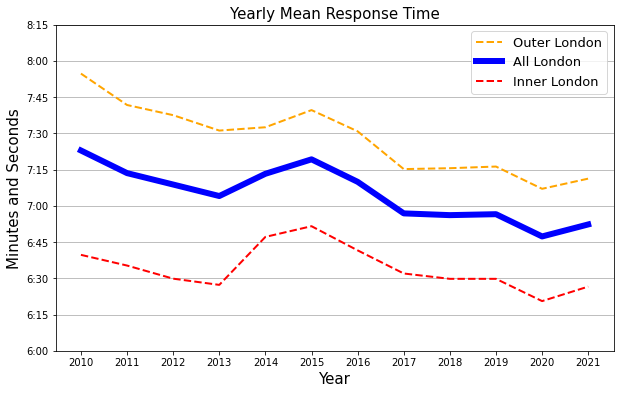

In [22]:
#Yearly Mean
fig, ax = plt.subplots(1, figsize=(10, 6))

ax.plot(outer_df.columns[:-1], outer_df.mean()[:-1], linewidth=2, linestyle='dashed', color='orange')
ax.plot(df.columns[:-1], df.mean()[:-1], linewidth=6, color='blue')
ax.plot(inner_df.columns[:-1], inner_df.mean()[:-1], color='red', linewidth=2, linestyle='dashed')

ax.set_ylim(ymin=360, ymax = 480)
ax.set_yticks([6*60,6.25*60,6.5*60,6.75*60,7*60,7.25*60,7.5*60,7.75*60,8*60,8.25*60])
ax.set_yticklabels(['6:00','6:15','6:30','6:45','7:00','7:15','7:30','7:45','8:00','8:15'])
ax.grid(axis='y')
ax.set_title('Yearly Mean Response Time', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Minutes and Seconds', fontsize=15)
ax.legend(['Outer London','All London','Inner London'], prop={'size': 13})

It seems to have generally improved over 10 years. Inner London has consistently shorter response times than Outer London

### How has it improved over 10 years by borough?

Text(0.5, 1.0, '10-year Improvement in Response Times for each Inner London Borough')

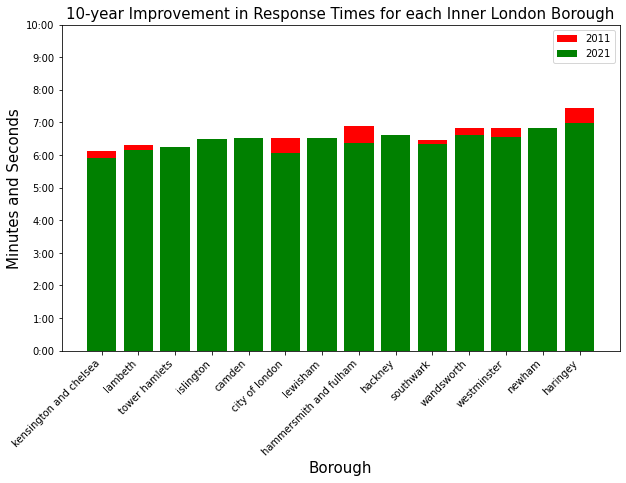

In [23]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2011'], color='red')
plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2011','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('10-year Improvement in Response Times for each Inner London Borough', fontsize=15)

Text(0.5, 1.0, '10-year Improvement in Response Times for each Outer London Borough')

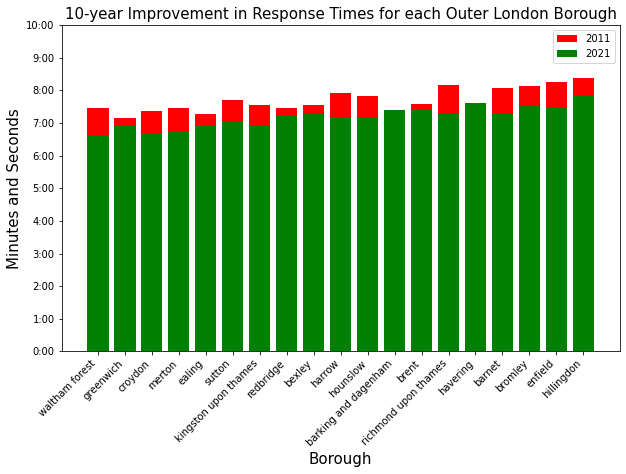

In [24]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2011'], color='red')
plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2011','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('10-year Improvement in Response Times for each Outer London Borough', fontsize=15)

### How has it Improved over 1 year by borough?

Text(0.5, 1.0, '1-year Improvement in Response Times for each Outer London Borough')

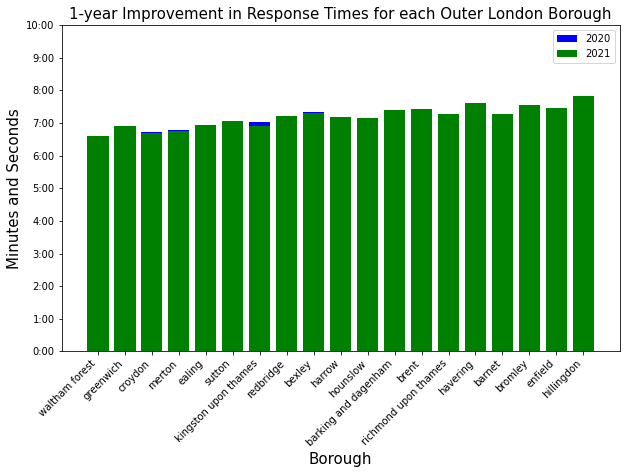

In [25]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2020'], color='blue')
plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2020','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('1-year Improvement in Response Times for each Outer London Borough', fontsize=15)

Text(0.5, 1.0, '1-year Improvement in Response Times for each Inner London Borough')

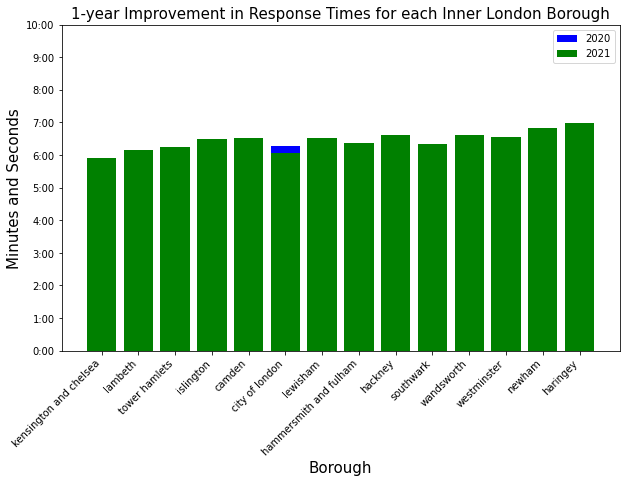

In [26]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2020'], color='blue')
plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2020','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('1-year Improvement in Response Times for each Inner London Borough', fontsize=15)

### GeoPlot

### 11 Year AVG

In [236]:
minmean, maxmean = geo_df['mean'].min(), geo_df['mean'].max()

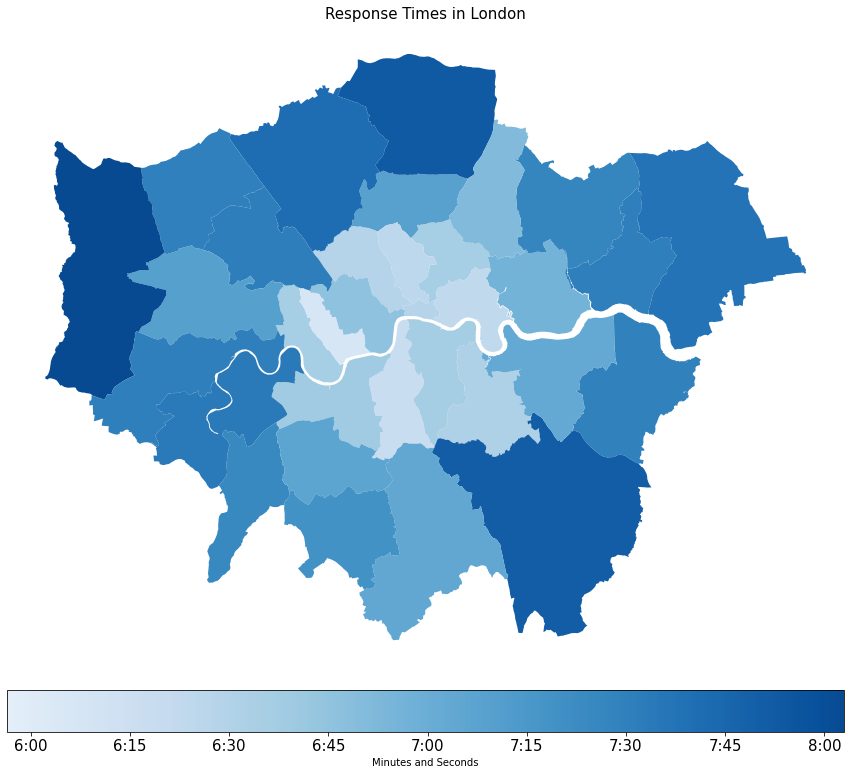

In [243]:
f, ax = plt.subplots(1, figsize=(15, 15))

cmap = cm.get_cmap('Blues', 256)
newcmap = ListedColormap(cmap(np.linspace(0.1, .9, 256)))

ax = geo_df.plot(column='mean', cmap=newcmap ,ax=ax,  
          markersize=10, vmin=minmean-10, vmax=483,
                  legend=True,legend_kwds={'orientation':'horizontal','label':'Minutes and Seconds', 'extend':'neither', 'pad':0.025})

plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
ax.set_axis_off()
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xticks([6*60,6.25*60,6.5*60,6.75*60,7*60,7.25*60,7.5*60,7.75*60,8*60])
colourbar.set_xticklabels(['6:00','6:15','6:30','6:45','7:00','7:15','7:30','7:45','8:00'], fontsize=15)

plt.show()


We can see the difference between Inner and Outer, so lets look at each separately

Outer

In [257]:
outer_minmean, outer_maxmean = outer_geo_df['mean'].min(), outer_geo_df['mean'].max()
outer_minmean, outer_maxmean

(411.67, 492.0)

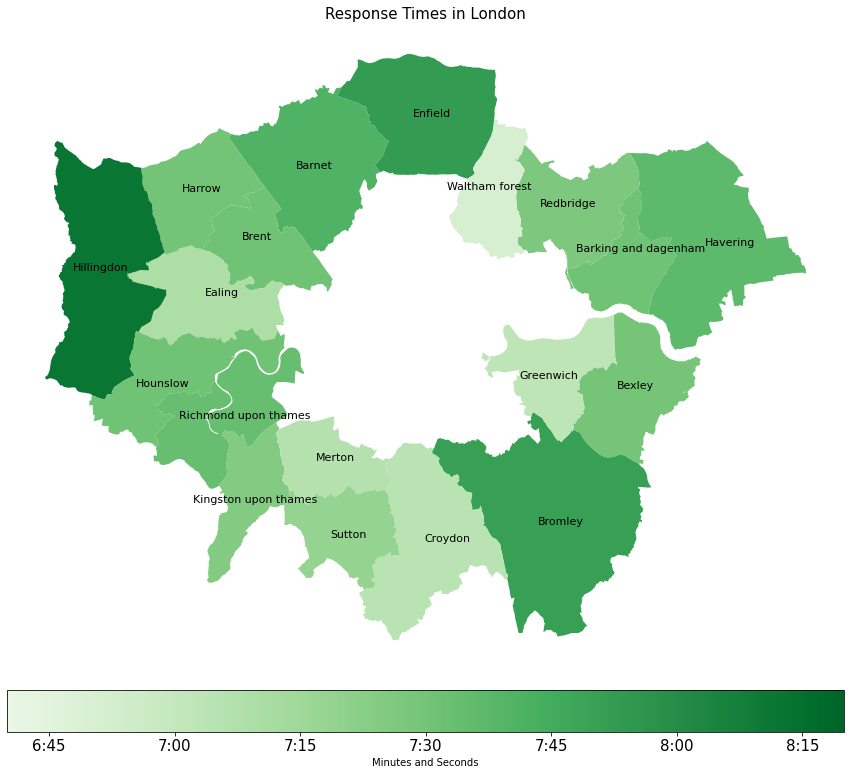

In [302]:
f, ax = plt.subplots(1, figsize=(15, 15))

cmap = cm.get_cmap('Greens', 256)
newcmap = ListedColormap(cmap(np.linspace(0.1, .9, 256)))

ax = outer_geo_df.plot(column='mean', cmap=newcmap ,ax=ax,  
          markersize=10, vmin=400, vmax=500,
                  legend=True,legend_kwds={'orientation':'horizontal','label':'Minutes and Seconds', 'extend':'neither', 'pad':0.025})

plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
ax.set_axis_off()
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xticks([6.75*60, 7*60,7.25*60,7.5*60,7.75*60,8*60, 8.25*60])
colourbar.set_xticklabels(['6:45','7:00','7:15','7:30','7:45','8:00','8:15'], fontsize=15)

for idx, row in outer_geo_df.iterrows():
    plt.annotate(text=row['name'].capitalize(), xy=row['coords'],
                 horizontalalignment='center', fontsize=11)
    
plt.show()


Inner

In [303]:
inner_minmean, inner_maxmean = inner_geo_df['mean'].min(), inner_geo_df['mean'].max()
inner_minmean, inner_maxmean

(366.42, 428.33)

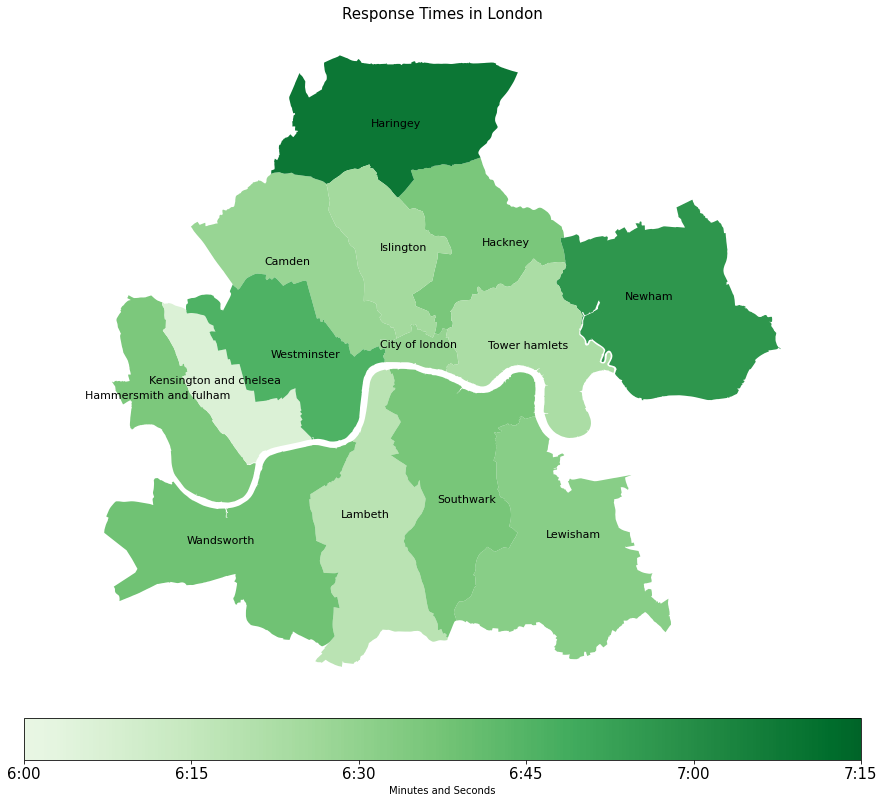

In [412]:
f, ax = plt.subplots(1, figsize=(15, 15))

cmap = cm.get_cmap('Greens', 256)
newcmap = ListedColormap(cmap(np.linspace(0.1, .9, 256)))

ax = inner_geo_df.plot(column='mean', cmap=newcmap ,ax=ax,  
          markersize=10, vmin=360, vmax=435,
                  legend=True,legend_kwds={'orientation':'horizontal','label':'Minutes and Seconds', 'extend':'neither', 'pad':0.025})

plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
ax.set_axis_off()
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xticks([6*60, 6.25*60, 6.5*60, 6.75*60, 7*60, 7.25*60])
colourbar.set_xticklabels(['6:00','6:15', '6:30', '6:45','7:00','7:15'], fontsize=15)

for idx, row in inner_geo_df.iterrows():
    plt.annotate(text=row['name'].capitalize(), xy=row['coords'],
                 horizontalalignment='center', fontsize=11)
    
plt.show()


### 2021

In [414]:
minmean, maxmean = geo_df['2021'].min(), geo_df['2021'].max()
minmean, maxmean

(355, 470)

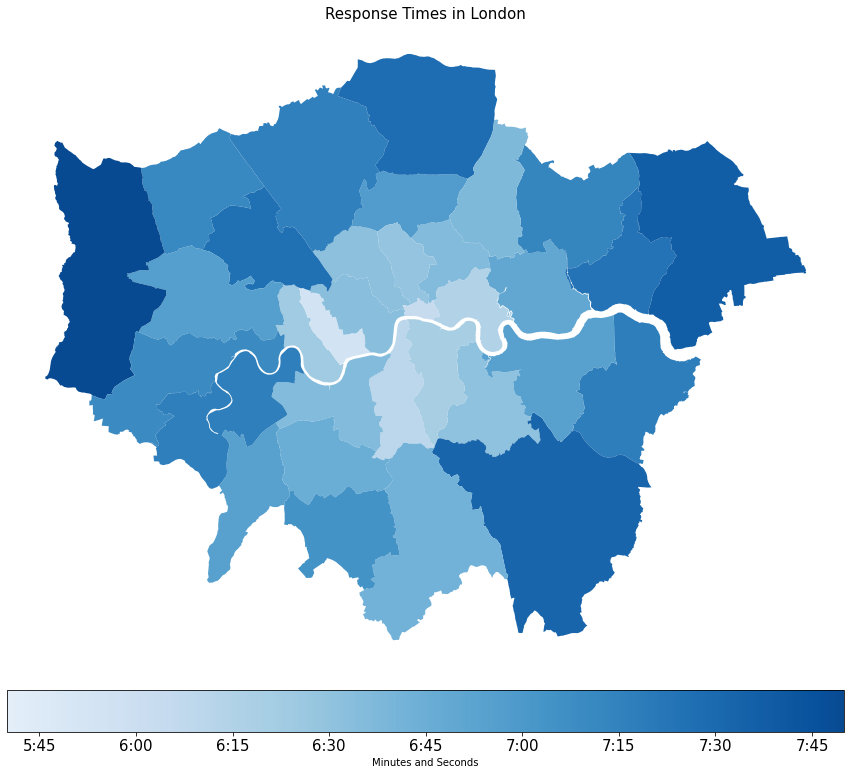

In [419]:
f, ax = plt.subplots(1, figsize=(15, 15))

cmap = cm.get_cmap('Blues', 256)
newcmap = ListedColormap(cmap(np.linspace(0.1, .9, 256)))

ax = geo_df.plot(column='2021', cmap=newcmap ,ax=ax,  
          markersize=10, vmin=minmean-15, vmax=maxmean,
                  legend=True,legend_kwds={'orientation':'horizontal','label':'Minutes and Seconds', 'extend':'neither', 'pad':0.025})

plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
ax.set_axis_off()
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xticks([5.75*60, 6*60,6.25*60,6.5*60,6.75*60,7*60,7.25*60,7.5*60,7.75*60])
colourbar.set_xticklabels(['5:45','6:00','6:15','6:30','6:45','7:00','7:15','7:30','7:45'], fontsize=15)

plt.show()


In [257]:
outer_minmean, outer_maxmean = outer_geo_df['2021'].min(), outer_geo_df['2021'].max()
outer_minmean, outer_maxmean

(411.67, 492.0)

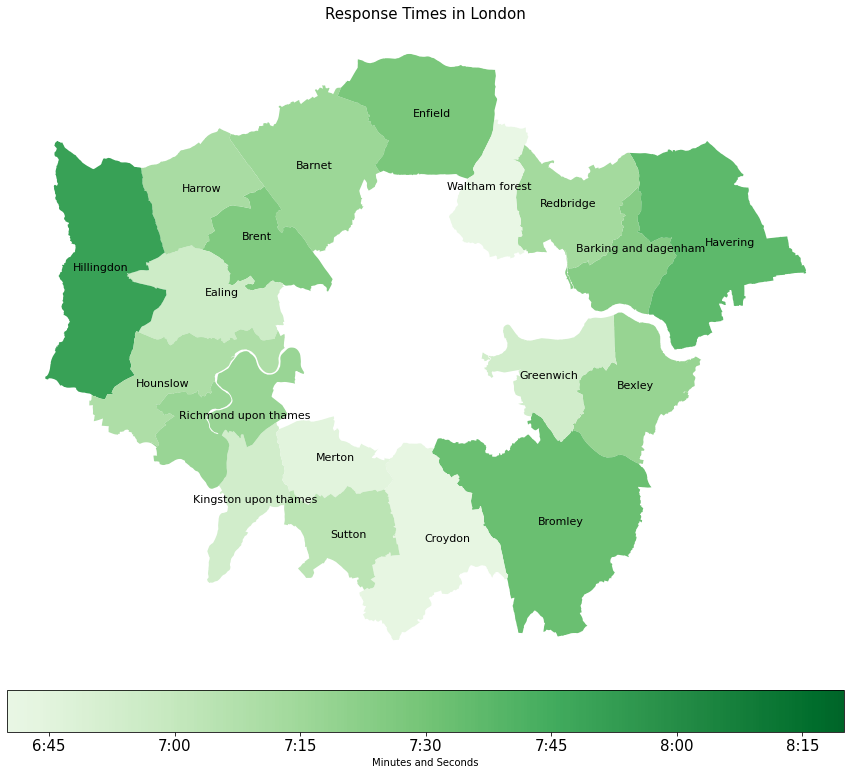

In [420]:
f, ax = plt.subplots(1, figsize=(15, 15))

cmap = cm.get_cmap('Greens', 256)
newcmap = ListedColormap(cmap(np.linspace(0.1, .9, 256)))

ax = outer_geo_df.plot(column='2021', cmap=newcmap ,ax=ax,  
          markersize=10, vmin=400, vmax=500,
                  legend=True,legend_kwds={'orientation':'horizontal','label':'Minutes and Seconds', 'extend':'neither', 'pad':0.025})

plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
ax.set_axis_off()
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xticks([6.75*60, 7*60,7.25*60,7.5*60,7.75*60,8*60, 8.25*60])
colourbar.set_xticklabels(['6:45','7:00','7:15','7:30','7:45','8:00','8:15'], fontsize=15)

for idx, row in outer_geo_df.iterrows():
    plt.annotate(text=row['name'].capitalize(), xy=row['coords'],
                 horizontalalignment='center', fontsize=11)
    
plt.show()


In [423]:
inner_minmean, inner_maxmean = inner_geo_df['2021'].min(), inner_geo_df['2021'].max()
inner_minmean, inner_maxmean

(355, 418)

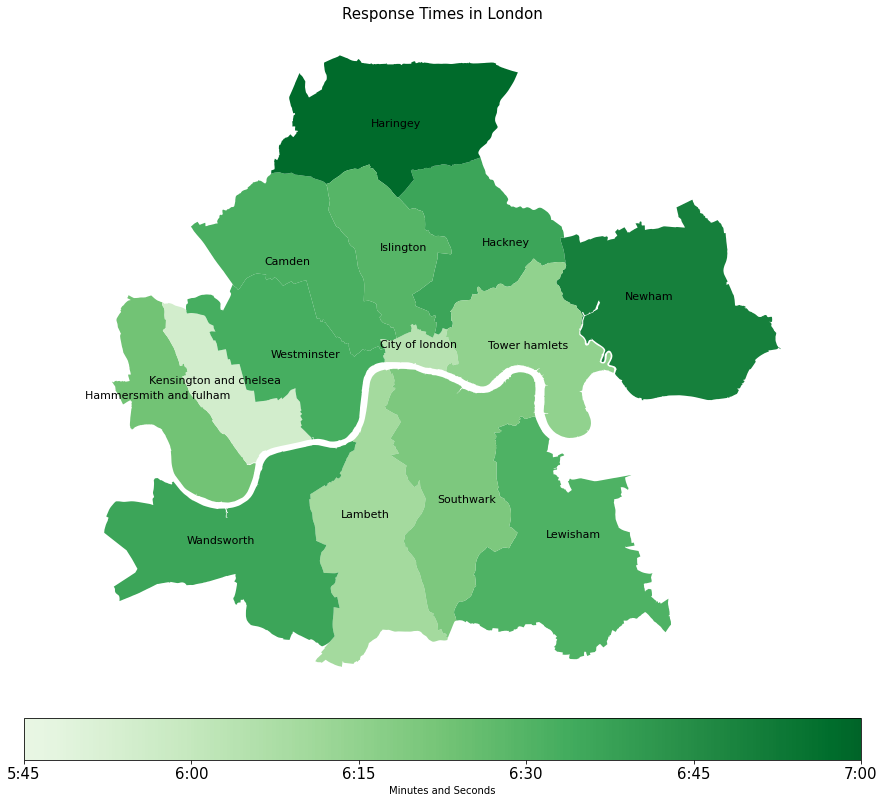

In [429]:
f, ax = plt.subplots(1, figsize=(15, 15))

cmap = cm.get_cmap('Greens', 256)
newcmap = ListedColormap(cmap(np.linspace(0.1, .9, 256)))

ax = inner_geo_df.plot(column='2021', cmap=newcmap ,ax=ax,  
          markersize=10, vmin=345, vmax=420,
                  legend=True,legend_kwds={'orientation':'horizontal','label':'Minutes and Seconds', 'extend':'neither', 'pad':0.025})

plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
ax.set_axis_off()
colourbar = ax.get_figure().get_axes()[1]
colourbar.set_xticks([5.75*60, 6*60, 6.25*60, 6.5*60, 6.75*60, 7*60])
colourbar.set_xticklabels(['5:45','6:00','6:15', '6:30', '6:45','7:00'], fontsize=15)

for idx, row in inner_geo_df.iterrows():
    plt.annotate(text=row['name'].capitalize(), xy=row['coords'],
                 horizontalalignment='center', fontsize=11)
    
plt.show()


## Avg Response vs Area size

In [504]:
np.array([0, 15000])*2

array([    0, 30000])

In [521]:
inx=np.array([0, 5000])
iny = x*0.010775 +361.336876
outx=np.array([5000,15000])
outy = x*0.003774   + 406.102659
y= x*0.006912 + 378.899837

Text(0.5, 1.0, 'Relationship between size of borough and response time')

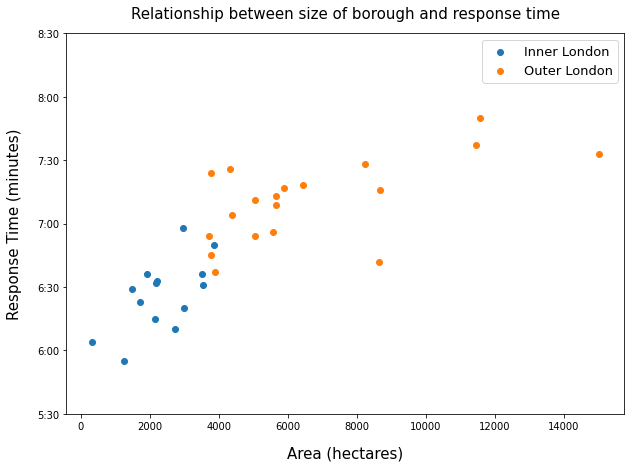

In [556]:
fig, ax = plt.subplots(1, figsize=(10, 7))

ax.scatter(x=inner_geo_df.area_hectares, y=inner_geo_df['2021'])
ax.scatter(x=outer_geo_df.area_hectares, y=outer_geo_df['2021'])
plt.legend(['Inner London','Outer London'], fontsize=13)
plt.yticks([5.5*60,6*60,6.5*60,7*60,7.5*60,8*60,8.5*60],
           ['5:30','6:00','6:30','7:00','7:30','8:00','8:30']);
plt.ylabel('Response Time (minutes)', fontsize=15, labelpad=15)
plt.xlabel('Area (hectares)', fontsize=15, labelpad=15)
plt.title('Relationship between size of borough and response time', fontsize=15, pad=15)


In [613]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Inner London Linear Regression

In [614]:
innermodel = smf.ols(formula =  'Q("2021") ~ area_hectares', data = inner_geo_df).fit()
innermodel.summary()

/home/benthompson/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q("2021")   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     7.749
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0165
Time:                        20:23:37   Log-Likelihood:                -55.569
No. Observations:                  14   AIC:                             115.1
Df Residuals:                      12   BIC:                             116.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       361.3369      9.790     36.908      0.000     340.006     382.668
area_hectares     0.0108      0.004      2.784      0.017       0.002       0.019
==============================================================================
Omnibus:                        0.186   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.385
Skew:                           0.012   Prob(JB):                        0.825
Kurtosis:                       2.188   Cond. No.                     6.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [625]:
inc,inm= innermodel.params
inx=np.array([200,4000])
iny=inm*inx+inc

Text(0.5, 1.0, 'Relationship between size of borough and response time [Inner London]')

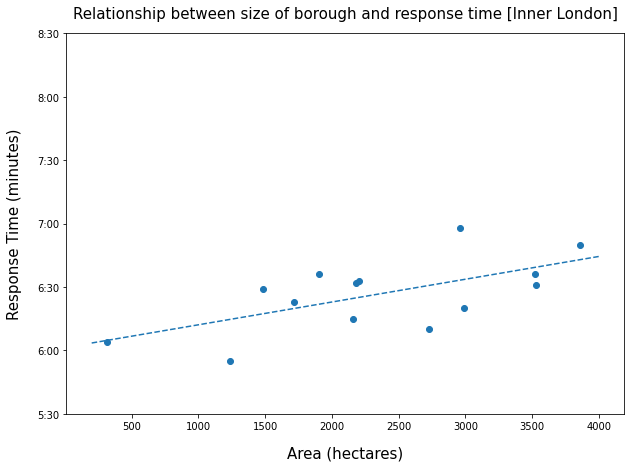

In [626]:
fig, ax = plt.subplots(1, figsize=(10, 7))

ax.scatter(x=inner_geo_df.area_hectares, y=inner_geo_df['2021'])
plt.plot(inx,iny, linestyle = 'dashed')
plt.yticks([5.5*60,6*60,6.5*60,7*60,7.5*60,8*60,8.5*60],
           ['5:30','6:00','6:30','7:00','7:30','8:00','8:30']);
plt.ylabel('Response Time (minutes)', fontsize=15, labelpad=15)
plt.xlabel('Area (hectares)', fontsize=15, labelpad=15)
plt.title('Relationship between size of borough and response time [Inner London]', fontsize=15, pad=15)


### Outer London Linear Regression


In [629]:
outermodel = smf.ols(formula =  'Q("2021") ~ area_hectares', data = outer_geo_df).fit()
outermodel.summary()

/home/benthompson/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q("2021")   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     9.812
Date:                Wed, 11 May 2022   Prob (F-statistic):            0.00607
Time:                        20:26:04   Log-Likelihood:                -78.777
No. Observations:                  19   AIC:                             161.6
Df Residuals:                      17   BIC:                             163.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       406.1027      8.847     45.903      0.000     387.437     424.768
area_hectares     0.0038      0.001      3.132      0.006       0.001       0.006
==============================================================================
Omnibus:                        1.381   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.735
Skew:                          -0.481   Prob(JB):                        0.693
Kurtosis:                       2.941   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [632]:
outc,outm = outermodel.params
outx = np.array([3000,15000])
outy = outm*outx + outc

Text(0.5, 1.0, 'Relationship between size of borough and response time [Outer London]')

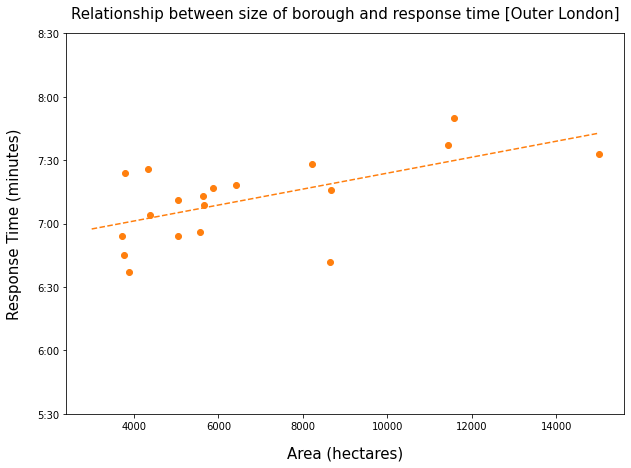

In [633]:
fig, ax = plt.subplots(1, figsize=(10, 7))

ax.scatter(x=outer_geo_df.area_hectares, y=outer_geo_df['2021'], color='C1')
plt.plot(outx,outy, linestyle = 'dashed', color='C1')
plt.yticks([5.5*60,6*60,6.5*60,7*60,7.5*60,8*60,8.5*60],
           ['5:30','6:00','6:30','7:00','7:30','8:00','8:30']);
plt.ylabel('Response Time (minutes)', fontsize=15, labelpad=15)
plt.xlabel('Area (hectares)', fontsize=15, labelpad=15)
plt.title('Relationship between size of borough and response time [Outer London]', fontsize=15, pad=15)
